In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/joaogarcia/Documents/DataScience/venv/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_csv('./Dataset/tech_test.tsv')
data.head(1)

,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side Refrigerators""]",General Electric,https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768,1000859768,lowes.1,GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel),"'25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10",Unnamed: 9,...,3.00,2020-03-23,2020,3,13,23,2020-04-24 15:58:56.293182,us,True,"['1000859768', '1000859852']"
0,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side ...",General Electric,https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by...,1000859852,lowes,GE 25.1-cu ft Side-by-Side Refrigerator with I...,'25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':...,NaN,...,3.0,2020-03-23,2020,3,13,23,2020-04-24 14:55:13.485647,us,False,"['1000859768', '1000859852']"


In [3]:
data.shape

(20472, 25)

In [4]:
data.columns

Index(['lowes', 'Refrigerators',
       '["Appliances", "Refrigerators", "Side-by-Side Refrigerators"]',
       'General Electric',
       'https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768',
       '1000859768', 'lowes.1',
       'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)',
       ''25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10',
       'Unnamed: 9',
       '{'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS', 'GSS25IYNFS'], 'style': ['Side-by-Side'], 'title': 'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Dep

In [5]:
data.head(1)

,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side Refrigerators""]",General Electric,https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768,1000859768,lowes.1,GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel),"'25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10",Unnamed: 9,...,3.00,2020-03-23,2020,3,13,23,2020-04-24 15:58:56.293182,us,True,"['1000859768', '1000859852']"
0,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side ...",General Electric,https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by...,1000859852,lowes,GE 25.1-cu ft Side-by-Side Refrigerator with I...,'25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':...,NaN,...,3.0,2020-03-23,2020,3,13,23,2020-04-24 14:55:13.485647,us,False,"['1000859768', '1000859852']"


O dataset parece não ter as colunas bem estabelecidas, então é bom eu estabelecer isso antes

# 1 - Limpando os dados

## 1.1 - Identificando e Entendendo as Colunas

In [6]:
new_columns =[]

In [7]:
data['lowes'].unique()

array(['lowes', 'bestbuy_us', 'homedepot', 'costco_us', 'whirlpool',
       'samsclub', 'maytag', 'walmart_us', 'ge_appliance_us', 'target',
       'lg_us', 'samsung_us', 'magalu'], dtype=object)

Essa é a coluna com o nome das empresas/sites que foram coletados os dados

In [8]:
new_columns.append('Company')
new_columns

['Company']

In [9]:
data['Refrigerators'].unique()

array(['Refrigerators'], dtype=object)

Essa coluna só tem um valor, ela indica o produto, no caso, só tem refrigerator

In [10]:
new_columns.append('Product')
new_columns

['Company', 'Product']

In [11]:
data['["Appliances", "Refrigerators", "Side-by-Side Refrigerators"]'].unique()

array(['["Appliances", "Refrigerators", "Side-by-Side Refrigerators"]',
       '["Appliances", "Refrigerators", "French Door Refrigerators"]',
       '["Best Buy", "Appliances", "Refrigerators", "Bottom-Freezer Refrigerators"]',
       nan,
       '["Whirlpool Brand U.S.A.", "Kitchen Appliances", "Refrigerators", "Refrigerators", "Side by Side Refrigerators"]',
       '["Best Buy", "Appliances", "Refrigerators", "All Refrigerators"]',
       '["All Departments", "Home", "Appliances", "Refrigerators & Freezers", "Refrigerators", "Side by Side Refrigerators"]',
       '["Appliances", "Refrigerators", "Top-Freezer Refrigerators"]',
       '["Appliances", "Refrigerators", "Bottom-Freezer Refrigerators"]',
       '["Best Buy", "Appliances", "Freezers & Ice Makers", "Chest Freezers"]',
       '["Home", "Kitchen", "Refrigeration", "Refrigerators"]',
       '["Whirlpool Brand U.S.A.", "Kitchen Appliances", "Refrigerators", "Refrigerators", "Top Freezer Refrigerators"]',
       '["Best Buy", "A

Parece ser o caminho de páginas no site que foram percorridas para chegar no produto

In [12]:
new_columns.append('Website Path')
new_columns

['Company', 'Product', 'Website Path']

In [13]:
data['General Electric'].unique()

array(['General Electric', 'Frigidaire', 'Whirlpool',
       'Frigidaire Gallery', 'LG', 'Magic Chef', 'Samsung', 'Haier',
       'Kitchenaid', 'Newair', 'Monogram', 'Rca', 'Maytag', 'Insignia™',
       'Hotpoint', 'Bosch', 'Café', 'Amana', 'Cafe', 'Thor Kitchen',
       'Whynter', 'Vinotemp', 'Danby', 'Wine Enthusiast', 'Premium',
       'Galanz', 'Pepsi', 'Nostalgia', 'Arctic King', 'Chambers',
       'Summit Appliance', 'Silhouette', 'Norpole', 'Edgestar',
       'Fisher & Paykel', 'Avallon', 'Hisense', 'Kalamera',
       'Arctic Fresh', 'Avanti', 'Gladiator', 'Thermador', 'Cosmo',
       'Sunbeam', 'Kucht', 'Unique', 'Akdy', 'Saba', 'Danby Designer',
       'Thomson', 'Coca-Cola', 'Farberware'], dtype=object)

Marca da Geladeira

In [14]:
new_columns.append('Brand')
new_columns

['Company', 'Product', 'Website Path', 'Brand']

In [15]:
data['https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768'].unique()

array(['https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Black-Stainless/1000859852',
       'https://www.lowes.com/pd/Frigidaire-Gallery-21-7-cu-ft-Counter-depth-French-Door-Refrigerator-with-Dual-Ice-Maker-Smudge-Proof-Stainless-Steel-ENERGY-STAR/1000289721',
       'https://www.bestbuy.com/site/whirlpool-21-9-cu-ft-bottom-freezer-refrigerator-stainless-steel/3928039.p?skuId=3928039',
       ...,
       'https://www.whirlpool.com/kitchen/refrigeration/refrigerators/side-by-side/p.36-inch-wide-side-by-side-counter-depth-refrigerator-23-cu.-ft.wrs973cihz.html',
       'https://www.whirlpool.com/kitchen/refrigeration/refrigerators/side-by-side/p.36-inch-wide-side-by-side-counter-depth-refrigerator-23-cu.-ft.wrs973cihv.html',
       'https://www.homedepot.com//p/Samsung-33-in-W-19-4-cu-ft-French-Door-Refrigerator-in-Stainless-Steel-RF20HFENBSR/205541436'],
      dtype=object)

URL da geladeira

In [16]:
new_columns.append('URL')
new_columns

['Company', 'Product', 'Website Path', 'Brand', 'URL']

In [17]:
data['lowes.1'].unique()

array(['lowes', 'bestbuy_us', 'homedepot', 'costco_us', 'whirlpool',
       'samsclub', 'maytag', 'walmart_us', 'ge_appliance_us', 'target',
       'lg_us', 'samsung_us', 'magalu'], dtype=object)

In [18]:
len(data.loc[data['lowes.1'] == 'lowes.1'])

0

In [19]:
data.loc[data['lowes']== data['lowes.1']].shape

(20472, 25)

As duas colunas são iguais, tirando a linha (que na verdade tá sendo lida como o nome da coluna nesse momento)
que tem o valor como lowes.1. 

Parece ser só um outlier, ou algum erro na coleta dos dados

Vou só dropar essa coluna da tabela mesmo.

In [20]:
data = data.drop(columns=['lowes.1'])
data.head(1)

,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side Refrigerators""]",General Electric,https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768,1000859768,GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel),"'25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10",Unnamed: 9,"{'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS', 'GSS25IYNFS'], 'style': ['Side-by-Side'], 'title': 'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Depth Type': ['Standard-Depth'], 'Door Alarm': ['Yes'], 'Door Style': ['Contoured'], 'Frost-Free': ['Yes'], 'breadcrumb': ['Appliances', 'Refrigerators', 'Side-by-Side Refrigerators'], 'Handle Type': ['Standard'], 'Series Name': ['N/A'], 'Door Shelves': ['4'], 'Door Texture': ['Smooth'], 'Handle Color': ['Stainless steel'], 'Hidden Hinge': ['Yes'], 'Hub Required': ['No'], 'ADA Compliant': ['No'], 'Cabinet Color': ['Gray'], 'Freezer Light': ['Yes'], 'See-Thru Door': ['No'], 'Shelf Options': ['Adjustable spillproof sliding glass shelves'], 'Air Filtration': ['Yes'], 'Safety Listing': ['UL safety listing'], 'Works with iOS': ['No'], 'Dispenser Light': ['Yes'], 'Freezer Baskets': ['2'], 'Freezer Shelves': ['3'], 'Door within Door': ['No'], ""Lowe's Exclusive"": ['No'], 'Toe Grille Color': ['Gray'], 'Voice Controlled': ['No'], 'Water Filtration': ['Yes'], 'voice_controlled': ['No'], 'App Compatibility': ['No'], 'Dispenser Options': ['Filtered water and cubed/crushed ice'], 'Freezer Door Bins': ['0'], 'Refrigerator Size': ['Large (>36-in)'], 'Snack/Deli Drawer': ['No'], 'CEE Tier Qualified': ['N/A'], 'Child Safety Locks': ['Yes'], 'Works with Android': ['No'], 'Gallon Door Storage': ['Yes'], 'Wi-Fi Compatibility': ['No'], 'Freezer Door Shelves': ['5'], 'Actual Width (Inches)': ['36.25'], 'Common Width (Inches)': ['36'], 'ENERGY STAR Certified': ['No'], 'Fingerprint-Resistant': ['Yes'], 'Appliance Color/Finish': ['Stainless steel'], 'Water Filter Indicator': ['Yes'], 'Works with SmartThings': ['No'], 'Bluetooth Compatibility': ['No'], 'Works with Amazon Alexa': ['No'], 'Approved for Outdoor Use': ['No'], 'Space-Saving In-Door Ice': ['No'], 'Works with Apple HomeKit': ['No'], 'Manufacturer Color/Finish': ['Stainless Steel'], 'Custom Door Kit Compatible': ['No'], 'Depth (Less Door) (Inches)': ['28.5'], 'Freezer Capacity (Cu. Feet)': ['9.6'], 'Overall Capacity (Cu. Feet)': ['25.3'], 'Humidity-Controlled Crispers': ['1'], 'Depth with Door Open (Inches)': ['51.125'], 'Matching Air Filter (Model #)': ['N/A'], 'Temperature Controlled Drawer': ['No'], 'Dual Evaporator Cooling System': ['No'], 'Electronic Temperature Control': ['Yes'], 'Height to Top of Case (Inches)': ['68.75'], 'Height to Top of Door (Inches)': ['70.125'], 'Refrigerator Interior Lighting': ['LED'], 'Works with the Google Assistant': ['No'], 'CA Residents: Prop 65 Warning(s)': ['Yes'], 'Refrigerator Capacity (Cu. Feet)': ['15.7'], 'Depth (Excluding Handles) (Inches)': ['32.25'], 'Depth (Including Handles) (Inches)': ['33.875'], 'Compatible Ice Maker Model Number(s)': ['Factory-Installed'], 'Height to Top of Door Hinge (Inches)': ['69.75'], 'Matching Replacement Water Filter Model': ['XWF']}",...,3.00,2020-03-23,2020,3,13,23,2020-04-24 15:58:56.293182,us,True,"['1000859768', '1000859852']"
0,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side ...",General Electric,https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by...,1000859852,GE 25.1-cu ft Side-by-Side Refrigerator with I...,'25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':...,NaN,"{'brand': ['GE', 'Ge'], 'model': ['GSS25

In [21]:
data['1000859768'].unique()

array(['1000859852', '1000289721', '3928039', ..., 'WRS973CIHZ',
       'WRS973CIHV', '205541436'], dtype=object)

Vo supor que é um ID para aquele produto no banco de dados do site

Se eu tenho diversos sites no dataset, e cada um tem seu banco de dados, existe a possibilidade de produtos de sites diferentes terem o mesmo ID?

Bom, depois de entender as colunas, eu vejo essa possibilidade, apesar que talvez não importe muito

In [22]:
new_columns.append('ID')
new_columns

['Company', 'Product', 'Website Path', 'Brand', 'URL', 'ID']

In [23]:
data['GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)'].unique()

array(['GE 25.1-cu ft Side-by-Side Refrigerator with Ice Maker (Black Stainless)',
       'Frigidaire Gallery 21.7-cu ft Counter-depth French Door Refrigerator with Dual Ice Maker (Smudge-Proof Stainless Steel) ENERGY STAR',
       'Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrigerator - Stainless steel',
       ...,
       'Whirlpool 22.6-cu ft Counter-depth Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Black Stainless)',
       '36-inch Wide Side-by-Side Counter Depth Refrigerator - 23 cu. ft.',
       '33 in. W 19.4 cu. ft. French Door Refrigerator in Stainless Steel'],
      dtype=object)

É tipo uma descrição sucinta do produto

In [24]:
new_columns.append('Description')
new_columns

['Company', 'Product', 'Website Path', 'Brand', 'URL', 'ID', 'Description']

In [25]:
data["'25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10"].unique()

array(["'25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'side':6,8 'side-by-side':5 'stainless':14 'with':10",
       "'21.7':3 'counter':7 'counter-depth':6 'cu':4 'depth':8 'door':10 'dual':13 'energy':21 'french':9 'frigidaire':1 'ft':5 'gallery':2 'ice':14 'maker':15 'proof':18 'refrigerator':11 'smudge':17 'smudge-proof':16 'stainless':19 'star':22 'steel':20 'with':12",
       "'21.9':2 'bottom':6 'bottom-freezer':5 'cu':3 'freezer':7 'ft':4 'refrigerator':8 'stainless':9 'steel':10 'whirlpool':1",
       ...,
       "'22.6':2 'black':19 'by':10 'counter':6 'counter-depth':5 'cu':3 'depth':7 'fingerprint':17 'fingerprint-resistant':16 'ft':4 'ice':14 'maker':15 'refrigerator':12 'resistant':18 'side':9,11 'side-by-side':8 'stainless':20 'whirlpool':1 'with':13",
       "'23':11 '36':1 'by':6 'counter':8 'cu':12 'depth':9 'ft':13 'inch':2 'refrigerator':10 'side':5,7 'side-by-side':4 'wide':3",
       "'19.4':4 '33':1 'cu':5 'door':8 'french':7

Parecem características da geladeira, porém não parecem que cada geladeira se referem a um mesmo conjunto de características. Assim, eu não consigo transformar cada característica em coluna, porque senão vão ter muitos valores nulos na tabela.

A príncipio vou só por um nome nessa coluna

In [26]:
new_columns.append('Technical Features')
new_columns

['Company',
 'Product',
 'Website Path',
 'Brand',
 'URL',
 'ID',
 'Description',
 'Technical Features']

In [27]:
data['Unnamed: 9'].unique()

array([    nan, 3382.8 , 3124.8 , 2243.  , 1306.8 , 3598.8 , 3229.  ,
       1062.  , 1176.  , 3378.  , 2343.6 , 2079.6 , 1973.  , 1433.  ,
       1608.  , 1996.8 , 2502.  , 2152.8 , 1638.  , 2176.8 , 2068.8 ,
       4144.8 , 1703.  , 2489.  , 3117.6 , 3495.6 ,  159.  ,  934.8 ,
       3814.8 , 1978.8 , 1888.8 ,  946.8 , 2044.8 , 2860.8 , 2788.8 ,
       4774.8 , 2116.8 ,  713.76, 3199.  ,  310.8 , 3676.8 ,  349.99,
        499.99,  649.99,  519.99])

Eu não faço ideia do que seja esse numero, mas vendo essa tabela agora, me faz pensar: Eu tenho linhas duplicadas?

In [28]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
20442    False
20443    False
20444    False
20445    False
20446    False
20447    False
20448    False
20449    False
20450    False
20451    False
20452    False
20453    False
20454    False
20455    False
20456    False
20457    False
20458    False
20459    False
20460    False
20461    False
20462    False
20463    False
20464    False
20465    False
20466    False
20467    False
20468    False
20469    False
20470    False
20471    False
Length: 20472, dtype: bool

Não. Mas possivelmente eu tenho produtos exatamente iguais, e avaliações e comentários diferentes.

De qualquer forma, vou só dropar essa coluna

In [29]:
data.drop(columns=['Unnamed: 9'], inplace=True)

In [30]:
data.iloc[:1, 8]

0    {'brand': ['GE', 'Ge'], 'model': ['GSS25IBNTS'...
Name: {'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS', 'GSS25IYNFS'], 'style': ['Side-by-Side'], 'title': 'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Depth Type': ['Standard-Depth'], 'Door Alarm': ['Yes'], 'Door Style': ['Contoured'], 'Frost-Free': ['Yes'], 'breadcrumb': ['Appliances', 'Refrigerators', 'Side-by-Side Refrigerators'], 'Handle Type': ['Standard'], 'Series Name': ['N/A'], 'Door Shelves': ['4'], 'Door Texture': ['Smooth'], 'Handle Color': ['Stainless steel'], 'Hidden Hinge': ['Yes'], 'Hub Required': ['No'], 'ADA Compliant': ['No'], 'Cabinet Color': ['Gray'], 'Freezer Light': ['Yes'], 'See-Thru Door': ['No'], 'Shelf Options': ['Adjustable spillproof sliding glass shelves'], 'Air Filtration': ['Yes'], 'Safety Listing

Tá bem complicado de ler, porque são muitos valores. Mas me parecer ser mais specificações e caracteristicas da geladeira. Não consigo falar certamente que são o mesmo conjunto de característica para todas as linhas, ou se elas mudam como na outra coluna. Mas verifico isso depois.

In [31]:
new_columns.append('General Features')
new_columns

['Company',
 'Product',
 'Website Path',
 'Brand',
 'URL',
 'ID',
 'Description',
 'Technical Features',
 'General Features']

In [32]:
data.iloc[:, 9].unique()

array(['2020-05-26 21:51:28.597592', '2020-05-26 21:50:49.940754',
       '2020-06-05 18:35:55.990040', ..., '2020-05-26 21:51:55.999516',
       '2020-05-27 00:36:45.071872', '2020-05-27 00:36:45.004317'],
      dtype=object)

Data e horário de algo. Do que não sei, mas veremos mais tarde

In [140]:
data.iloc[:5,9:]

,2020-05-26 21:51:27.805520,218183104,Functional,Pros: fingerprint resistant so you don't have to constantly wipe it down. Drawers are good size and are plentiful. Water dispenser works great. Cons: it's noisy when making ice to the point you think one thing is wrong with it.,3.00,2020-03-23,2020,3,13,23,2020-04-24 15:58:56.293182,us,True,"['1000859768', '1000859852']"
0,2020-05-26 21:51:28.597592,218183104,Functional,Pros: fingerprint resistant so you don't have ...,3.0,2020-03-23,2020,3,13,23,2020-04-24 14:55:13.485647,us,False,"['1000859768', '1000859852']"
1,2020-05-26 21:50:49.940754,190217370,Ample Door Storage User Friendly Visibility,Feels solid and “upscale”. Excellent design of...,5.0,2019-09-28,2019,9,39,28,2020-03-30 23:53:02.331711,us,True,['1000289721']
2,2020-06-05 18:35:55.990040,c407068f-f900-3478-a983-ad74754c1460,So much room,I love this fridge. So much room over having a...,5.0,2019-12-13,2019,12,50,13,2020-04-28 14:09:38.255158,us,True,"['3928039', '3928048', '3979801', '6112639']"
3,2020-06-05 17:55:04.244327,c407068f-f900-3478-a983-ad74754c1460,So much room,I love this fridge. So much room over having a...,5.0,2019-12-13,2019,12,50,13,2020-04-28 14:09:41.960342,us,False,"['3928039', '3928048', '3979801', '6112639']"
4,2020-06-05 18:40:24.418263,c407068f-f900-3478-a983-ad74754c1460,So much room,I love this fridge. So much room over having a...,5.0,2019-12-13,2019,12,50,13,2020-04-27 19:49:13.756253,us,False,"['3928039', '3928048', '3979801', '6112639']"


Acho que a partir de agora começam a parte de comentários e avaliações. Esse numero na coluna 10 parece ser um ID do banco de dados do site, mas não sei se é um ID do usuario que comentou, ou tipo um ID para o comentário

In [141]:
data.iloc[:,22].unique()

array(["['1000859768', '1000859852']", "['1000289721']",
       "['3928039', '3928048', '3979801', '6112639']", ...,
       "['1000040109', '1000040113', '999901081']", "['205541436']",
       "['1000329603', '1002619072']"], dtype=object)

Vamo la! Parece que as próximas colunas tão bem dificeis de se entender o que é. Tipo a penultima coluna com um boolean aleatório, que não faz muito sentido.

A última coluna parece ter o ID das cores disponiveis para aquela geladeira, e o ID que eu tinha definido anteriormente é o ID para aquela cor especifica.

Eu tenho umas datas que não me interessam muito, e eu nem sei o que são.

Mas tem uma coluna que parece ter o numero de estrelas que foi dada naquela avaliação. Coluna 13.

Vo dropa as datas, essa coluna 10 e o boolean no final, e mudar o nome dessa coluna de estrelas

In [142]:
data = data.drop(columns=['2020-05-26 21:51:27.805520','218183104','2020-03-23', '2020', '3','13',
                   '23', '2020-04-24 15:58:56.293182', 'us', 'True'])
data.columns

Index(['lowes', 'Refrigerators',
       '["Appliances", "Refrigerators", "Side-by-Side Refrigerators"]',
       'General Electric',
       'https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768',
       '1000859768',
       'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)',
       ''25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10',
       '{'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS', 'GSS25IYNFS'], 'style': ['Side-by-Side'], 'title': 'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Depth Type': ['Standard-Depth'], 'D

In [143]:
new_columns.append('Comment#1')
new_columns.append('Comment#2')
new_columns.append('Rating')
new_columns.append('Available Colors')
new_columns

['Company',
 'Product',
 'Website Path',
 'Brand',
 'URL',
 'ID',
 'Description',
 'Technical Features',
 'General Features',
 'Comment#1',
 'Comment#2',
 'Rating',
 'Available Colors']

In [144]:
print(len(new_columns))
print(len(data.columns))

13
13


Antes de mudar o nome das colunas, preciso adicionar os nomes atuais como uma linha do dataset para não perder informações

In [145]:
new_row = pd.Series(data.columns)
new_row

0                                                 lowes
1                                         Refrigerators
2     ["Appliances", "Refrigerators", "Side-by-Side ...
3                                      General Electric
4     https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by...
5                                            1000859768
6     GE 25.3-cu ft Side-by-Side Refrigerator with I...
7     '25.3':2 'by':7 'cu':3 'fingerprint':14 'finge...
8     {'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS'...
9                                            Functional
10    Pros: fingerprint resistant so you don't have ...
11                                                 3.00
12                         ['1000859768', '1000859852']
dtype: object

In [146]:
temp = data.copy()
temp.loc[-1] = np.array(new_row)
temp.tail()

,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side Refrigerators""]",General Electric,https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768,1000859768,GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel),"'25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10","{'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS', 'GSS25IYNFS'], 'style': ['Side-by-Side'], 'title': 'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Depth Type': ['Standard-Depth'], 'Door Alarm': ['Yes'], 'Door Style': ['Contoured'], 'Frost-Free': ['Yes'], 'breadcrumb': ['Appliances', 'Refrigerators', 'Side-by-Side Refrigerators'], 'Handle Type': ['Standard'], 'Series Name': ['N/A'], 'Door Shelves': ['4'], 'Door Texture': ['Smooth'], 'Handle Color': ['Stainless steel'], 'Hidden Hinge': ['Yes'], 'Hub Required': ['No'], 'ADA Compliant': ['No'], 'Cabinet Color': ['Gray'], 'Freezer Light': ['Yes'], 'See-Thru Door': ['No'], 'Shelf Options': ['Adjustable spillproof sliding glass shelves'], 'Air Filtration': ['Yes'], 'Safety Listing': ['UL safety listing'], 'Works with iOS': ['No'], 'Dispenser Light': ['Yes'], 'Freezer Baskets': ['2'], 'Freezer Shelves': ['3'], 'Door within Door': ['No'], ""Lowe's Exclusive"": ['No'], 'Toe Grille Color': ['Gray'], 'Voice Controlled': ['No'], 'Water Filtration': ['Yes'], 'voice_controlled': ['No'], 'App Compatibility': ['No'], 'Dispenser Options': ['Filtered water and cubed/crushed ice'], 'Freezer Door Bins': ['0'], 'Refrigerator Size': ['Large (>36-in)'], 'Snack/Deli Drawer': ['No'], 'CEE Tier Qualified': ['N/A'], 'Child Safety Locks': ['Yes'], 'Works with Android': ['No'], 'Gallon Door Storage': ['Yes'], 'Wi-Fi Compatibility': ['No'], 'Freezer Door Shelves': ['5'], 'Actual Width (Inches)': ['36.25'], 'Common Width (Inches)': ['36'], 'ENERGY STAR Certified': ['No'], 'Fingerprint-Resistant': ['Yes'], 'Appliance Color/Finish': ['Stainless steel'], 'Water Filter Indicator': ['Yes'], 'Works with SmartThings': ['No'], 'Bluetooth Compatibility': ['No'], 'Works with Amazon Alexa': ['No'], 'Approved for Outdoor Use': ['No'], 'Space-Saving In-Door Ice': ['No'], 'Works with Apple HomeKit': ['No'], 'Manufacturer Color/Finish': ['Stainless Steel'], 'Custom Door Kit Compatible': ['No'], 'Depth (Less Door) (Inches)': ['28.5'], 'Freezer Capacity (Cu. Feet)': ['9.6'], 'Overall Capacity (Cu. Feet)': ['25.3'], 'Humidity-Controlled Crispers': ['1'], 'Depth with Door Open (Inches)': ['51.125'], 'Matching Air Filter (Model #)': ['N/A'], 'Temperature Controlled Drawer': ['No'], 'Dual Evaporator Cooling System': ['No'], 'Electronic Temperature Control': ['Yes'], 'Height to Top of Case (Inches)': ['68.75'], 'Height to Top of Door (Inches)': ['70.125'], 'Refrigerator Interior Lighting': ['LED'], 'Works with the Google Assistant': ['No'], 'CA Residents: Prop 65 Warning(s)': ['Yes'], 'Refrigerator Capacity (Cu. Feet)': ['15.7'], 'Depth (Excluding Handles) (Inches)': ['32.25'], 'Depth (Including Handles) (Inches)': ['33.875'], 'Compatible Ice Maker Model Number(s)': ['Factory-Installed'], 'Height to Top of Door Hinge (Inches)': ['69.75'], 'Matching Replacement Water Filter Model': ['XWF']}",Functional,Pros: fingerprint resistant so you don't have to constantly wipe it down. Drawers are good size and are plentiful. Water dispenser works great. Cons: it's noisy when making ice to the point you think one thing is wrong with it.,3.00,"['1000859768', '1000859852']"
20468,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Top-Freezer R...",Whirlpool,https://www.lowes.com/pd/Whirlpool-18-2-cu-f

In [148]:
temp.reset_index(inplace=True)
temp.drop(columns='index', inplace=True)
temp.tail()

,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side Refrigerators""]",General Electric,https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by-Side-Refrigerator-with-Ice-Maker-Fingerprint-Resistant-Stainless-Steel/1000859768,1000859768,GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel),"'25.3':2 'by':7 'cu':3 'fingerprint':14 'fingerprint-resistant':13 'ft':4 'ge':1 'ice':11 'maker':12 'refrigerator':9 'resistant':15 'side':6,8 'side-by-side':5 'stainless':16 'steel':17 'with':10","{'brand': ['GE', 'Ge'], 'model': ['GSS25IYNFS', 'GSS25IYNFS'], 'style': ['Side-by-Side'], 'title': 'GE 25.3-cu ft Side-by-Side Refrigerator with Ice Maker (Fingerprint-Resistant Stainless Steel)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Depth Type': ['Standard-Depth'], 'Door Alarm': ['Yes'], 'Door Style': ['Contoured'], 'Frost-Free': ['Yes'], 'breadcrumb': ['Appliances', 'Refrigerators', 'Side-by-Side Refrigerators'], 'Handle Type': ['Standard'], 'Series Name': ['N/A'], 'Door Shelves': ['4'], 'Door Texture': ['Smooth'], 'Handle Color': ['Stainless steel'], 'Hidden Hinge': ['Yes'], 'Hub Required': ['No'], 'ADA Compliant': ['No'], 'Cabinet Color': ['Gray'], 'Freezer Light': ['Yes'], 'See-Thru Door': ['No'], 'Shelf Options': ['Adjustable spillproof sliding glass shelves'], 'Air Filtration': ['Yes'], 'Safety Listing': ['UL safety listing'], 'Works with iOS': ['No'], 'Dispenser Light': ['Yes'], 'Freezer Baskets': ['2'], 'Freezer Shelves': ['3'], 'Door within Door': ['No'], ""Lowe's Exclusive"": ['No'], 'Toe Grille Color': ['Gray'], 'Voice Controlled': ['No'], 'Water Filtration': ['Yes'], 'voice_controlled': ['No'], 'App Compatibility': ['No'], 'Dispenser Options': ['Filtered water and cubed/crushed ice'], 'Freezer Door Bins': ['0'], 'Refrigerator Size': ['Large (>36-in)'], 'Snack/Deli Drawer': ['No'], 'CEE Tier Qualified': ['N/A'], 'Child Safety Locks': ['Yes'], 'Works with Android': ['No'], 'Gallon Door Storage': ['Yes'], 'Wi-Fi Compatibility': ['No'], 'Freezer Door Shelves': ['5'], 'Actual Width (Inches)': ['36.25'], 'Common Width (Inches)': ['36'], 'ENERGY STAR Certified': ['No'], 'Fingerprint-Resistant': ['Yes'], 'Appliance Color/Finish': ['Stainless steel'], 'Water Filter Indicator': ['Yes'], 'Works with SmartThings': ['No'], 'Bluetooth Compatibility': ['No'], 'Works with Amazon Alexa': ['No'], 'Approved for Outdoor Use': ['No'], 'Space-Saving In-Door Ice': ['No'], 'Works with Apple HomeKit': ['No'], 'Manufacturer Color/Finish': ['Stainless Steel'], 'Custom Door Kit Compatible': ['No'], 'Depth (Less Door) (Inches)': ['28.5'], 'Freezer Capacity (Cu. Feet)': ['9.6'], 'Overall Capacity (Cu. Feet)': ['25.3'], 'Humidity-Controlled Crispers': ['1'], 'Depth with Door Open (Inches)': ['51.125'], 'Matching Air Filter (Model #)': ['N/A'], 'Temperature Controlled Drawer': ['No'], 'Dual Evaporator Cooling System': ['No'], 'Electronic Temperature Control': ['Yes'], 'Height to Top of Case (Inches)': ['68.75'], 'Height to Top of Door (Inches)': ['70.125'], 'Refrigerator Interior Lighting': ['LED'], 'Works with the Google Assistant': ['No'], 'CA Residents: Prop 65 Warning(s)': ['Yes'], 'Refrigerator Capacity (Cu. Feet)': ['15.7'], 'Depth (Excluding Handles) (Inches)': ['32.25'], 'Depth (Including Handles) (Inches)': ['33.875'], 'Compatible Ice Maker Model Number(s)': ['Factory-Installed'], 'Height to Top of Door Hinge (Inches)': ['69.75'], 'Matching Replacement Water Filter Model': ['XWF']}",Functional,Pros: fingerprint resistant so you don't have to constantly wipe it down. Drawers are good size and are plentiful. Water dispenser works great. Cons: it's noisy when making ice to the point you think one thing is wrong with it.,3.00,"['1000859768', '1000859852']"
20468,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Top-Freezer R...",Whirlpool,https://www.lowes.com/pd/Whirlpool-18-2-cu-f

In [149]:
temp.columns = new_columns
temp.columns

Index(['Company', 'Product', 'Website Path', 'Brand', 'URL', 'ID',
       'Description', 'Technical Features', 'General Features', 'Comment#1',
       'Comment#2', 'Rating', 'Available Colors'],
      dtype='object')

Vo muda o nome de algumas colunas só pra ficar mais correto

In [150]:
temp.rename(columns={'Company':'Website'}, inplace=True)

In [151]:
data = temp.copy()
data.head(5)

,Website,Product,Website Path,Brand,URL,ID,Description,Technical Features,General Features,Comment#1,Comment#2,Rating,Available Colors
0,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side ...",General Electric,https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by...,1000859852,GE 25.1-cu ft Side-by-Side Refrigerator with I...,'25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':...,"{'brand': ['GE', 'Ge'], 'model': ['GSS25IBNTS'...",Functional,Pros: fingerprint resistant so you don't have ...,3,"['1000859768', '1000859852']"
1,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""French Door R...",Frigidaire,https://www.lowes.com/pd/Frigidaire-Gallery-21...,1000289721,Frigidaire Gallery 21.7-cu ft Counter-depth Fr...,'21.7':3 'counter':7 'counter-depth':6 'cu':4 ...,"{'brand': ['Frigidaire', 'Frigidaire'], 'model...",Ample Door Storage User Friendly Visibility,Feels solid and “upscale”. Excellent design of...,5,['1000289721']
2,bestbuy_us,Refrigerators,"[""Best Buy"", ""Appliances"", ""Refrigerators"", ""B...",Whirlpool,https://www.bestbuy.com/site/whirlpool-21-9-cu...,3928039,Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrig...,'21.9':2 'bottom':6 'bottom-freezer':5 'cu':3 ...,"{'brand': ['whirlpool'], 'Other_UPC': ['883049...",So much room,I love this fridge. So much room over having a...,5,"['3928039', '3928048', '3979801', '6112639']"
3,bestbuy_us,Refrigerators,"[""Best Buy"", ""Appliances"", ""Refrigerators"", ""B...",Whirlpool,https://www.bestbuy.com/site/whirlpool-21-9-cu...,3979801,Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrig...,'21.9':2 'black':9 'bottom':6 'bottom-freezer'...,"{'brand': ['whirlpool'], 'Other_UPC': ['883049...",So much room,I love this fridge. So much room over having a...,5,"['3928039', '3928048', '3979801', '6112639']"
4,bestbuy_us,Refrigerators,"[""Best Buy"", ""Appliances"", ""Refrigerators"", ""B...",Whirlpool,https://www.bestbuy.com/site/whirlpool-22-1-cu...,6112639,Whirlpool - 22.1 Cu. Ft. Bottom-Freezer Refrig...,'22.1':2 'black':9 'bottom':6 'bottom-freezer'...,"{'brand': ['whirlpool'], 'Other_UPC': ['883049...",So much room,I love this fridge. So much room over having a...,5,"['3928039', '3928048', '3979801', '6112639']"


## 1.2 -  Parsear a coluna General Features, tornando o que é uma string, um objeto para facilitar a vida

In [152]:
general_features = data['General Features']
print(general_features[0])

{'brand': ['GE', 'Ge'], 'model': ['GSS25IBNTS', 'GSS25IBNTS'], 'style': ['Side-by-Side'], 'title': 'GE 25.1-cu ft Side-by-Side Refrigerator with Ice Maker (Black Stainless)', 'UNSPSC': ['52141500'], 'Built-In': ['No'], 'Warranty': ['1-year limited'], 'warranty': ['1-year limited'], 'Ice Maker': ['Single'], 'Sub-Brand': ['N/A'], 'Depth Type': ['Standard-Depth'], 'Door Alarm': ['Yes'], 'Door Style': ['Contoured'], 'Frost-Free': ['Yes'], 'breadcrumb': ['Appliances', 'Refrigerators', 'Side-by-Side Refrigerators'], 'Handle Type': ['Standard'], 'Series Name': ['N/A'], 'Door Shelves': ['4'], 'Door Texture': ['Smooth'], 'Handle Color': ['Black'], 'Hidden Hinge': ['Yes'], 'Hub Required': ['No'], 'ADA Compliant': ['No'], 'Cabinet Color': ['Gray'], 'Freezer Light': ['Yes'], 'See-Thru Door': ['No'], 'Shelf Options': ['Adjustable spillproof sliding glass shelves'], 'Air Filtration': ['Yes'], 'Safety Listing': ['UL safety listing'], 'Works with iOS': ['No'], 'Dispenser Light': ['Yes'], 'Freezer Bask

In [153]:
def get_features(general_features):

    features = {}
    count = 0

    x = general_features.split('], ')
    for string in x:
        y = string.strip('{}')
        if(y.find('"') == -1):
            y = y.split("': ")
        else:
            y = y.split('": ')
        for text in y:
            if(count==0):
                count=1
                if(text.strip(" '") == 'title'):
                    count= 0 
                    continue
                if(text.find('[') == -1):
                    key = text.strip(" '").lower()
                    features[key]=None
            else:
                count=0
                ## Vo ignora algumas colunas que não satisfazem o padrão, porque uma dela é sobre o Title, 
                ## que indica o mesmo que a coluna description
                if(text.find('[') == -1):
                    continue
                else:
                    value = text.strip('[ ').split(',')
                    features[key] = value
    for key, value in features.items():
        if(key.find('unspsc') != -1):
            features['unspsc'] = features.pop(key)
            break
    return features

In [155]:
temp = data.copy()
count = 0
for row in general_features:
    features = get_features(row)
    temp.at[count, 'General Features'] =  features
    count+=1
temp['General Features'][0].keys()

dict_keys(['brand', 'model', 'style', 'built-in', 'warranty', 'ice maker', 'sub-brand', 'depth type', 'door alarm', 'door style', 'frost-free', 'breadcrumb', 'handle type', 'series name', 'door shelves', 'door texture', 'handle color', 'hidden hinge', 'hub required', 'ada compliant', 'cabinet color', 'freezer light', 'see-thru door', 'shelf options', 'air filtration', 'safety listing', 'works with ios', 'dispenser light', 'freezer baskets', 'freezer shelves', 'door within door', '"lowe\'s exclusive', 'toe grille color', 'voice controlled', 'water filtration', 'voice_controlled', 'app compatibility', 'dispenser options', 'freezer door bins', 'refrigerator size', 'snack/deli drawer', 'cee tier qualified', 'child safety locks', 'works with android', 'gallon door storage', 'wi-fi compatibility', 'freezer door shelves', 'actual width (inches)', 'common width (inches)', 'energy star certified', 'fingerprint-resistant', 'appliance color/finish', 'water filter indicator', 'works with smartthin

In [156]:
data = temp.copy()

## 2 - Explorando mais os dados 

### 2.1 - Quantos produtos eu tenho retirados de cada site?

In [158]:
websites = data['Website'].unique()

In [159]:
num_products_per_website = data.groupby(['Website'])['Product'].count().sort_values(ascending=False)
num_products_per_website

Website
lowes              9518
homedepot          4058
bestbuy_us         2406
whirlpool          1241
walmart_us          993
costco_us           738
ge_appliance_us     490
lg_us               453
samsclub            200
maytag              187
samsung_us          146
target               40
magalu                3
Name: Product, dtype: int64

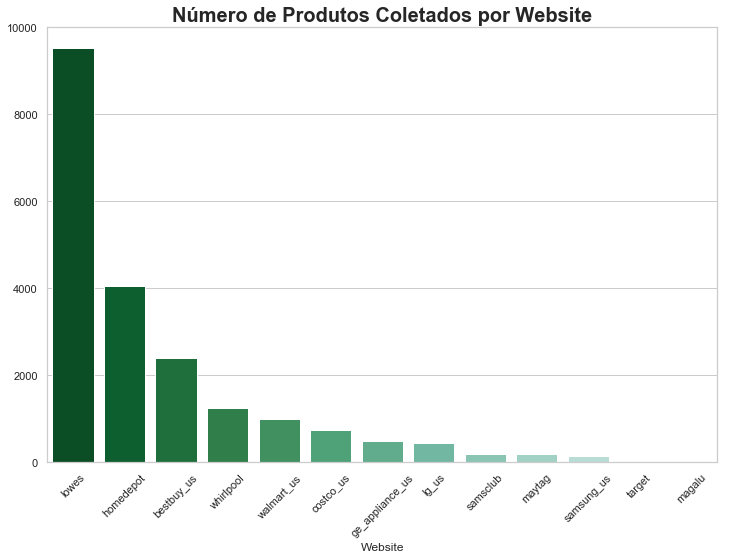

In [160]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")

plt.title('Número de Produtos Coletados por Website', fontdict={'fontsize': 20, 'fontweight': 'bold'})

barplot = sns.barplot(x=num_products_per_website.index, 
            y=num_products_per_website.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(num_products_per_website)+2))
plt.xticks(rotation=45)
plt.show()

### 2.2 - Quantos produtos tenho de cada Marca?

In [161]:
brands = data['Brand'].unique()

In [165]:
num_products_per_brand = data.groupby(['Brand'])['Product'].count().sort_values(ascending=False)
ten_most_brands = num_products_per_brand.head(10)
ten_most_brands

Brand
Whirlpool             6608
General Electric      4897
Frigidaire            2926
Samsung               1854
LG                    1788
Kitchenaid             840
Maytag                 436
Cafe                   303
Insignia™              161
Frigidaire Gallery     121
Name: Product, dtype: int64

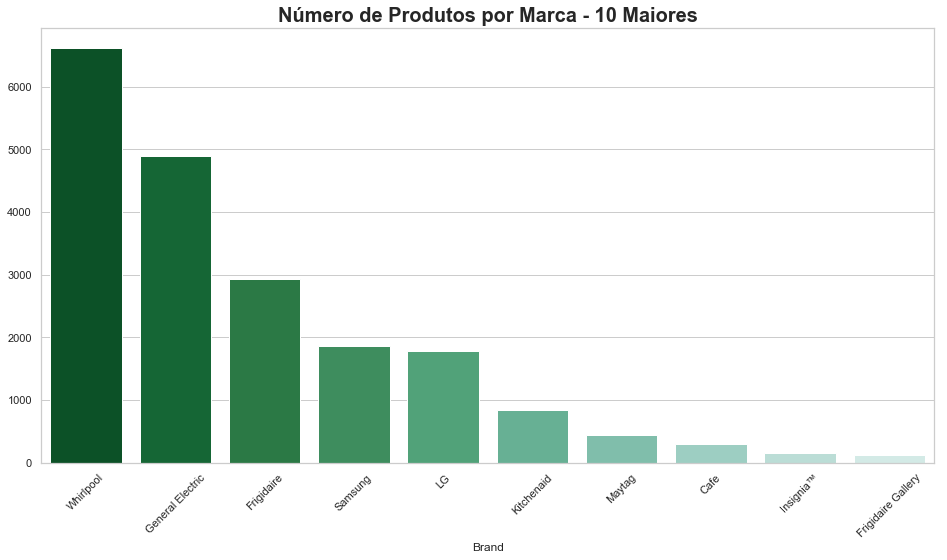

In [168]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")

plt.title('Número de Produtos por Marca - 10 Maiores', fontdict={'fontsize': 20, 'fontweight': 'bold'})

barplot = sns.barplot(x=ten_most_brands.index, 
            y=ten_most_brands.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(ten_most_brands)+2))
plt.xticks(rotation=45)
plt.show()

Tenho muita marca, então a vizualização não ficou muito boa!! Vou pegar só as 10 maiores

### 2.3 - Qual o menor e o maior valor de Rating?

In [170]:
ratings = data['Rating']

In [171]:
ratings.describe()

count     20473.0
unique        6.0
top           5.0
freq      11374.0
Name: Rating, dtype: float64

In [172]:
ratings.unique()

array([3.0, 5.0, 2.0, 4.0, 1.0, '3.00'], dtype=object)

Tenho um Outlier que eu errei ao inserir a nova linha lá em cima

In [173]:
data['Rating'] = data['Rating'].astype(float)
data['Rating'].unique()

array([3., 5., 2., 4., 1.])

In [174]:
ratings = data['Rating']
ratings.describe()

count    20473.000000
mean         4.229180
std          1.122322
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [175]:
num_votes_per_rating = data.groupby(['Rating'])['Website'].count().sort_values(ascending=False)
num_votes_per_rating

Rating
5.0    11374
4.0     5584
3.0     1584
1.0     1236
2.0      695
Name: Website, dtype: int64

### Insights dessa parte:

- Não posso não dar nenhuma estrela de avaliação, nem dar estrelas quebradas, i.e, 2.5, 3.5, etc. Pelo menos não tem nenhum desses casos nesse dataset.

- A nota maior possível é 5.

- Eu tenho muito mais avaliações positivas do que negativas. Se contar notas 4 e 5 positivas, eu tenho mais de 16.000 avaliações positivas de um conjunto de 20.000.

Agora eu queria ver essa distribuição de notas por site e por empresa. Será que temos algum outlier ou algo assim?

### 2.4 - Distribuição nas notas para cada uma das empresas. Vou pegar somente as 4 primeiras.

In [176]:
websites = num_products_per_website.index
websites[:4]

Index(['lowes', 'homedepot', 'bestbuy_us', 'whirlpool'], dtype='object', name='Website')

/home/joaogarcia/Documents/DataScience/venv/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


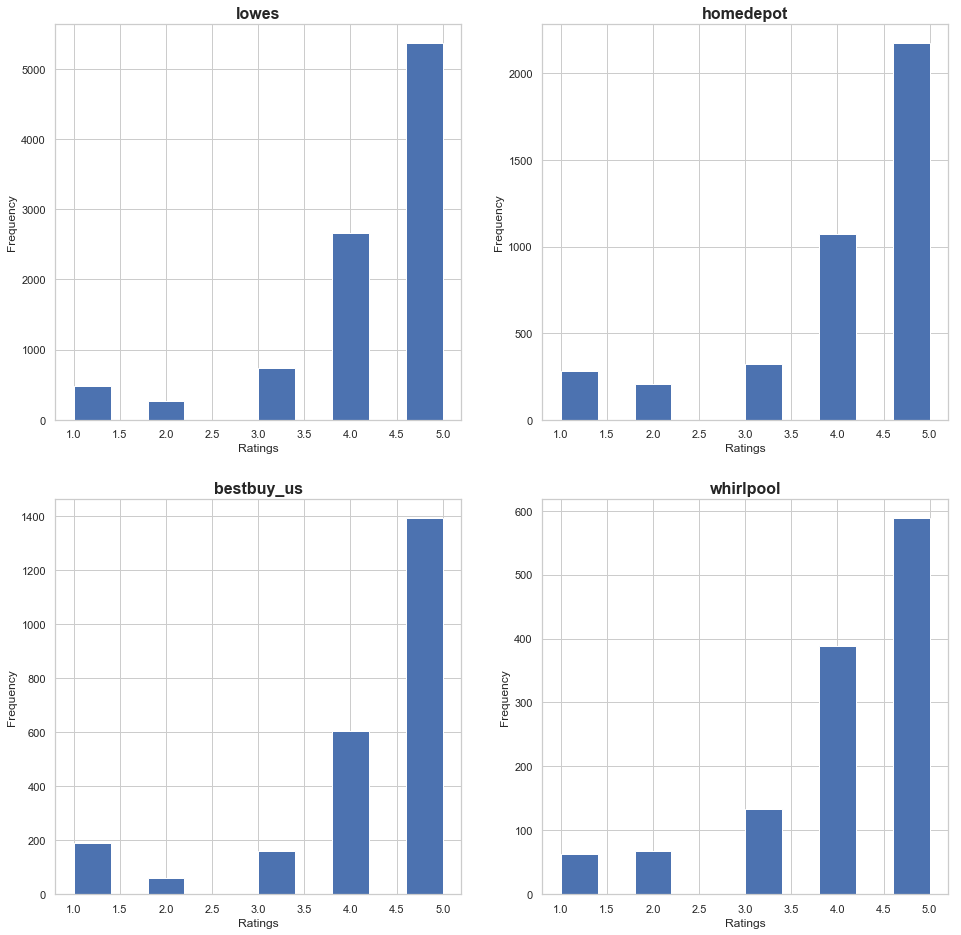

In [177]:
count=1
plt.figure(figsize = (16,16))
for x in websites[:4]:
    plt.subplot(2,2, count)
    data[data['Website'] == x]['Rating'].plot(kind = 'hist')
    plt.xlabel('Ratings')
    plt.title(x, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    count = count+1
plt.show()

Todos tem mais ou menos a mesma distribuição de notas. Será que aqueles com menos produtos, tem distribuições diferentes?

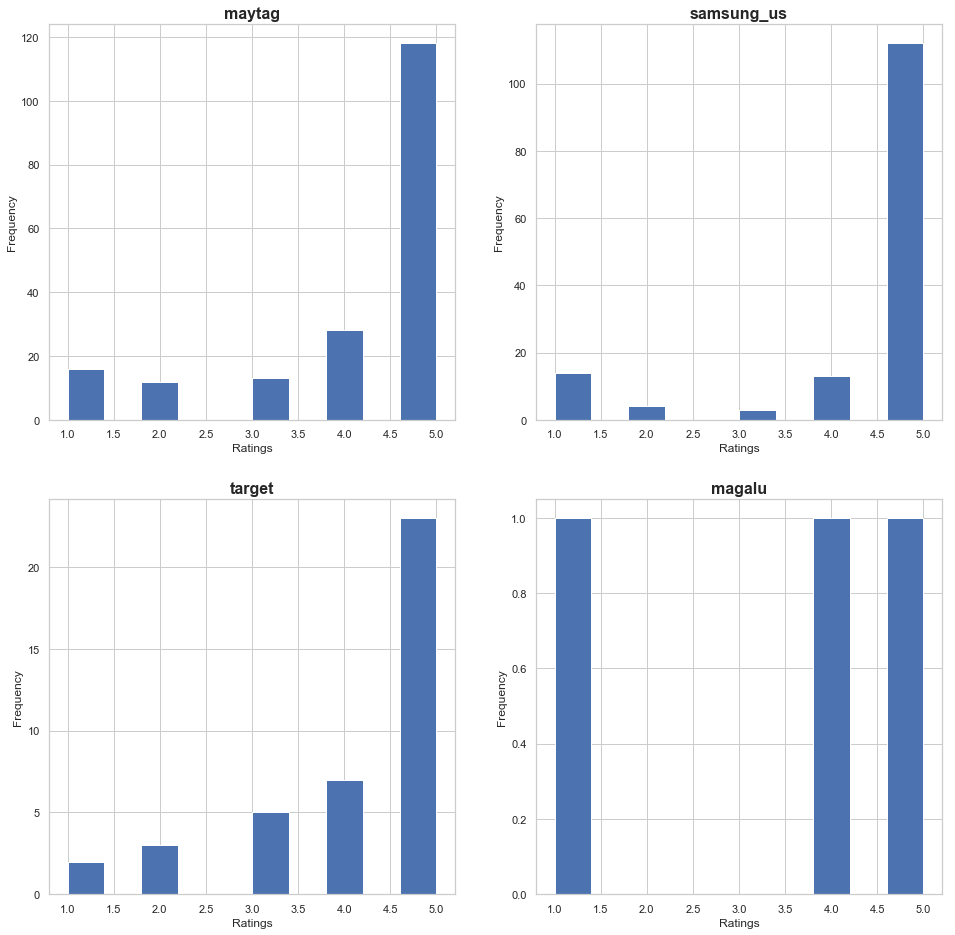

In [178]:
count=1
plt.figure(figsize = (16,16))
for x in websites[-4:]:
    plt.subplot(2,2, count)
    data[data['Website'] == x]['Rating'].plot(kind = 'hist')
    plt.xlabel('Ratings')
    plt.title(x, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    count = count+1
plt.show()

Não há muita diferença, exceto pela Magalu que só tem 3 produtos votados então é bem complicado de fazer a distribuição corretamente

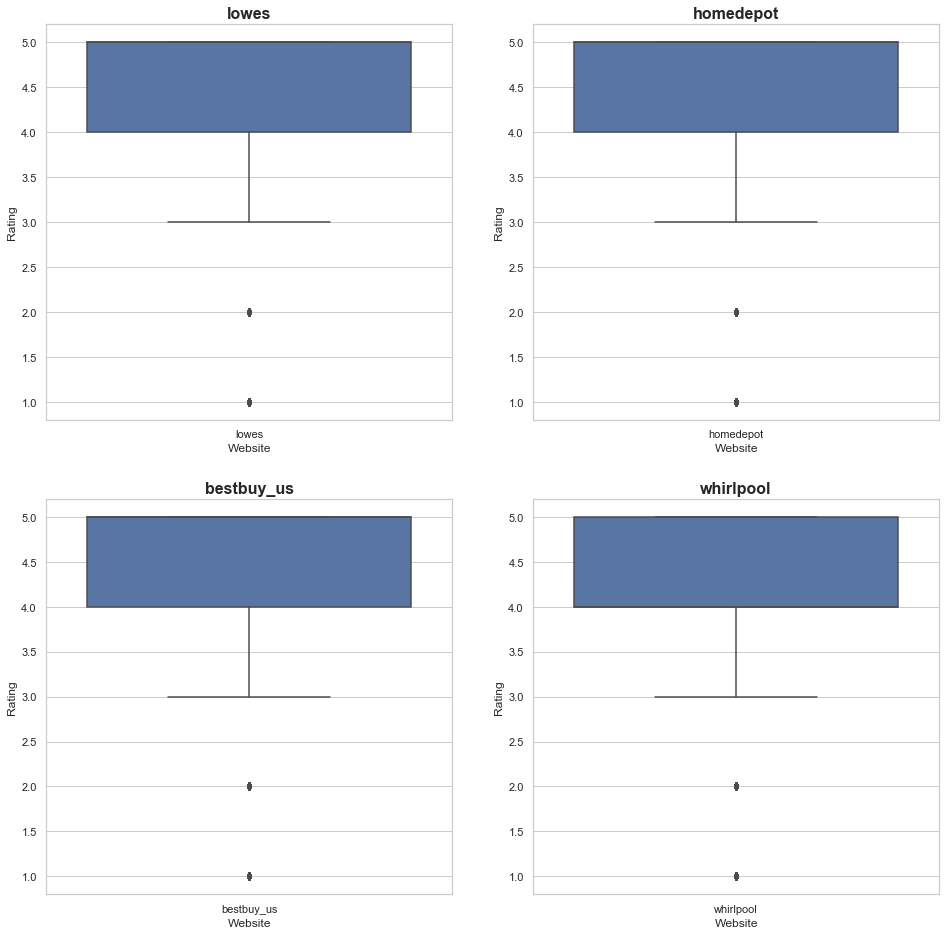

In [179]:
count=1
plt.figure(figsize = (16,16))
for x in websites[:4]:
    plt.subplot(2,2, count)
    plt.title(x, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    sns.boxplot(data = data[data['Website'] == x], x='Website', y= 'Rating')
    
    count = count+1
plt.show()

Alguns outliers mas nada demais, já era esperado, porque o primeiro quartil das notas já é nota 4, então é normal que notas abaixo disso se tornem outliers num boxplot

### 2.5 - Distribuição nas notas para cada uma das marcas. Vou pegar somente as 4 primeiras.

In [181]:
brands = num_products_per_brand.index
brands[:4]

Index(['Whirlpool', 'General Electric', 'Frigidaire', 'Samsung'], dtype='object', name='Brand')

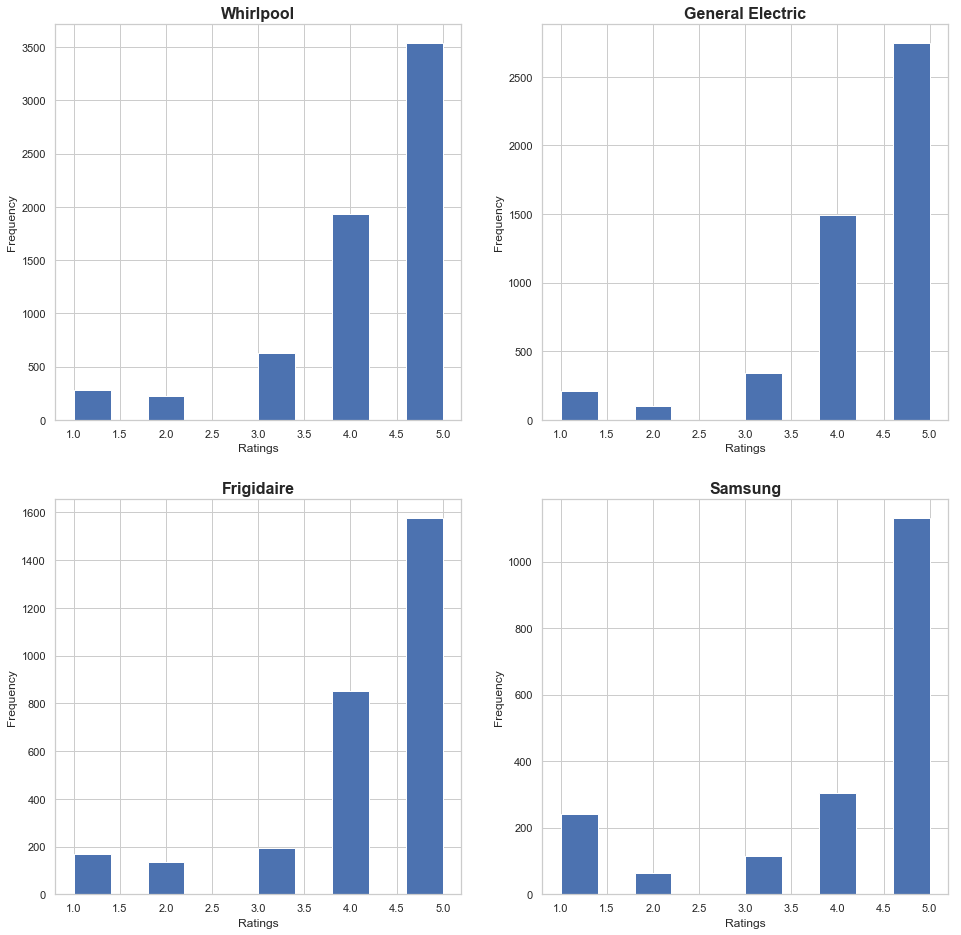

In [182]:
count=1
plt.figure(figsize = (16,16))
for x in brands[:4]:
    plt.subplot(2,2, count)
    data[data['Brand'] == x]['Rating'].plot(kind = 'hist')
    plt.xlabel('Ratings')
    plt.title(x, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    count = count+1
plt.show()

### 2.6 - Quais as marcas com as menores notas?

In [183]:
worst_ratings = data.loc[data['Rating'] <= 2]

In [184]:
worst_brands = worst_ratings.groupby('Brand')['ID'].count().sort_values(ascending=False)
worst_brands = worst_brands.astype(float)

In [185]:
for x in worst_brands.index:
    worst_brands[x] = (float(worst_brands[x]) /float(num_products_per_brand[x]))
worst_brands.sort_values(ascending=False)

Brand
Coca-Cola             1.000000
Avanti                1.000000
Saba                  1.000000
Thor Kitchen          0.800000
Kalamera              0.500000
Fisher & Paykel       0.500000
Sunbeam               0.500000
Café                  0.428571
Summit Appliance      0.400000
Danby                 0.333333
Vinotemp              0.333333
Wine Enthusiast       0.250000
Newair                0.238095
Whynter               0.222222
Galanz                0.179487
Samsung               0.163970
Hisense               0.142857
Magic Chef            0.141667
Maytag                0.123853
Amana                 0.123077
LG                    0.120805
Frigidaire Gallery    0.115702
Hotpoint              0.111111
Kitchenaid            0.109524
Frigidaire            0.103554
Rca                   0.090909
Insignia™             0.086957
Haier                 0.084746
Cafe                  0.079208
Whirlpool             0.077179
Bosch                 0.068182
General Electric      0.064529
Na

Muito dos numeros já era algo esperado. Mas o valor do Café parece algo interessante, vou ver se tem algo ali

In [186]:
cafe = data.loc[data['Brand'] == 'Café']
len(cafe)

7

Nada demais mesmo. Só 7 valores, não pra analisar direito

### 2.6 - Número de cores disponíveis pode melhorar a avaliação?

### 2.6.1 - Criar uma coluna com o numero de cores

In [188]:
temp = data.copy()

colors = temp['Available Colors']
colors.head(5)

0                    ['1000859768', '1000859852']
1                                  ['1000289721']
2    ['3928039', '3928048', '3979801', '6112639']
3    ['3928039', '3928048', '3979801', '6112639']
4    ['3928039', '3928048', '3979801', '6112639']
Name: Available Colors, dtype: object

In [189]:
col_name = ['Available Colors']
temp['No. Colors'] = temp.apply(lambda x: len(x[col_name[0]].strip('[]').split(',')), axis=1)
temp['No. Colors'].head(5)

0    2
1    1
2    4
3    4
4    4
Name: No. Colors, dtype: int64

In [190]:
data= temp.copy()

In [191]:
rating_colors = data[['Rating', 'No. Colors']]
rating_colors.head()

,Rating,No. Colors
0,3.0,2
1,5.0,1
2,5.0,4
3,5.0,4
4,5.0,4


In [192]:
rating_colors.corr()

,Rating,No. Colors
Rating,1.000000,0.054744
No. Colors,0.054744,1.000000


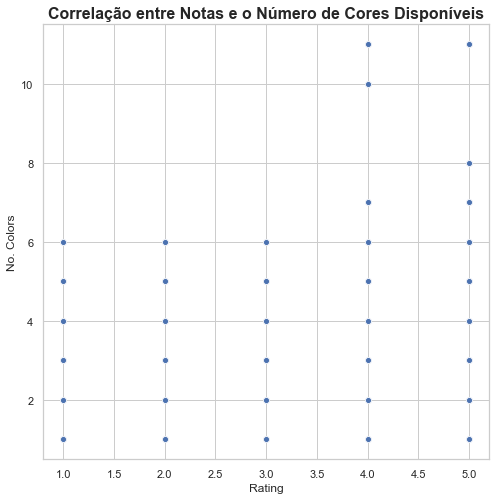

In [193]:
plt.figure(figsize = (8,8))
plt.title('Correlação entre Notas e o Número de Cores Disponíveis', 
          fontdict={'fontsize': 16, 'fontweight': 'bold'})

sns.scatterplot(x='Rating', y = 'No. Colors', data= rating_colors)
plt.show()

Não é o melhor gráfico para se ver a correlação porque as notas e o num de cores são numero inteiros. 

E a correlação entre as duas colunas é de 0.54, que é algo que dá pra notar no gráfico acima:
    **As notas são bem distribuidas para qualquer numero de cores, mas as geladeiras que tem mais cores disponiveis só tem nota acima de 4.**

## 3 - Finalizando

Já fiz análise o suficiente com os dados mais brutos. Agora tem que usar NLP pra trabalhar com os comentários e com as características dos produtos.

Algumas perguntas que quero responder:

1- Quais as características que se relacionam mais com comentários positivos? E os negativos?

2- Tem algum site com mais comentários positivos que outros?

3- Alguma marca tem melhores comentários em algum site especifico?


### 3.1 Arrumando o Dataset e salvando em outro arquivo

In [194]:
data.columns

Index(['Website', 'Product', 'Website Path', 'Brand', 'URL', 'ID',
       'Description', 'Technical Features', 'General Features', 'Comment#1',
       'Comment#2', 'Rating', 'Available Colors', 'No. Colors'],
      dtype='object')

Website Path não vai me agregar em nada na próxima fase de análise

In [195]:
data.drop(columns=['Website Path'], inplace=True)

In [196]:
data.head()

,Website,Product,Brand,URL,ID,Description,Technical Features,General Features,Comment#1,Comment#2,Rating,Available Colors,No. Colors
0,lowes,Refrigerators,General Electric,https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by...,1000859852,GE 25.1-cu ft Side-by-Side Refrigerator with I...,'25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':...,"{'brand': [''GE'', ' 'Ge''], 'model': [''GSS25...",Functional,Pros: fingerprint resistant so you don't have ...,3.0,"['1000859768', '1000859852']",2
1,lowes,Refrigerators,Frigidaire,https://www.lowes.com/pd/Frigidaire-Gallery-21...,1000289721,Frigidaire Gallery 21.7-cu ft Counter-depth Fr...,'21.7':3 'counter':7 'counter-depth':6 'cu':4 ...,"{'brand': [''Frigidaire'', ' 'Frigidaire''], '...",Ample Door Storage User Friendly Visibility,Feels solid and “upscale”. Excellent design of...,5.0,['1000289721'],1
2,bestbuy_us,Refrigerators,Whirlpool,https://www.bestbuy.com/site/whirlpool-21-9-cu...,3928039,Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrig...,'21.9':2 'bottom':6 'bottom-freezer':5 'cu':3 ...,"{'brand': [''whirlpool''], 'other_upc': [''883...",So much room,I love this fridge. So much room over having a...,5.0,"['3928039', '3928048', '3979801', '6112639']",4
3,bestbuy_us,Refrigerators,Whirlpool,https://www.bestbuy.com/site/whirlpool-21-9-cu...,3979801,Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrig...,'21.9':2 'black':9 'bottom':6 'bottom-freezer'...,"{'brand': [''whirlpool''], 'other_upc': [''883...",So much room,I love this fridge. So much room over having a...,5.0,"['3928039', '3928048', '3979801', '6112639']",4
4,bestbuy_us,Refrigerators,Whirlpool,https://www.bestbuy.com/site/whirlpool-22-1-cu...,6112639,Whirlpool - 22.1 Cu. Ft. Bottom-Freezer Refrig...,'22.1':2 'black':9 'bottom':6 'bottom-freezer'...,"{'brand': [''whirlpool''], 'other_upc': [''883...",So much room,I love this fridge. So much room over having a...,5.0,"['3928039', '3928048', '3979801', '6112639']",4


In [197]:
data.to_csv('./Dataset/NLP_Data.csv', encoding = "utf-8")